<a href="https://colab.research.google.com/github/Lord-Kanzler/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment_ALEX_KAISER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!

In [0]:
# Prior Probability
prob_drunk_prior = 1/1000 

# False Positive Rate
false_positive_rate = .08

In [0]:
# Function

def prob_drunk_given_positive(prior, false_positive):
  # True Positive Rate: 100%
  p_pos_user = 1
  # Complement of our prior
  p_non_user = 1 - (prior)

  numerator = (p_pos_user) * (prior)
  denominator = (p_pos_user) * (prior) + (false_positive) * (p_non_user)

  # Posterior Probability
  post_prob = numerator / denominator
  print("Probability that person is drunk is: ", post_prob)


In [172]:
# What is the probability that a person is drunk after one positive breathalyzer test?
#Calling Function:
prob_drunk_given_positive(prob_drunk_prior, false_positive_rate)

Probability that person is drunk is:  0.012357884330202669


In [173]:
# What is the probability that a person is drunk after two positive breathalyzer tests?
# Prior Probability
prob_drunk_prior = 0.012357884330202669
# False Positive Rate
false_positive_rate = .08

#Calling Function:
prob_drunk_given_positive(prob_drunk_prior, false_positive_rate)

Probability that person is drunk is:  0.13525210993291495


In [174]:
# How many positive breathalyzer tests are needed in order to have a probability 
# that's greater than 95% that a person is drunk beyond the legal limit?
# Prior Probability
prob_drunk_prior = 0.13525210993291495
# False Positive Rate
false_positive_rate = .08

#Calling Function:
prob_drunk_given_positive(prob_drunk_prior, false_positive_rate)

Probability that person is drunk is:  0.6615996951348605


In [175]:
# Prior Probability
prob_drunk_prior = 0.6615996951348605
# False Positive Rate
false_positive_rate = .08

#Calling Function:
prob_drunk_given_positive(prob_drunk_prior, false_positive_rate)

Probability that person is drunk is:  0.9606895076105054


**At least 4 breathalyzer tests are needed to get a probability of a person being drunk beyond legal limits with at least 95% certainty.**

***Explore scipy.stats.bayes_mvs***

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t, ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
# using tuna data set from yesterdays stretch goal

df = pd.read_csv('https://raw.githubusercontent.com/Lord-Kanzler/DS-Unit-1-Sprint-2-Statistics/master/module1/Tuna.csv')
df.head(50)

,Tuna,Mercury
0,albacore,0.0000
1,albacore,0.4100
2,albacore,0.8200
3,albacore,0.3200
4,albacore,0.0360
5,albacore,0.2800
6,albacore,0.2900
7,albacore,0.3400
8,albacore,0.3600
9,albacore,0.4200


In [179]:
# converting "mercury" to categorical
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['Mercury_categories'] = pd.cut(df['Mercury'], 4)

df.head()

,Tuna,Mercury,Mercury_categories
0,albacore,0.000,"(-0.00148, 0.37]"
1,albacore,0.410,"(0.37, 0.739]"
2,albacore,0.820,"(0.739, 1.109]"
3,albacore,0.320,"(-0.00148, 0.37]"
4,albacore,0.036,"(-0.00148, 0.37]"


In [180]:
albacore = df[df['Tuna']=='albacore ']

albacore.head(10)

,Tuna,Mercury,Mercury_categories
0,albacore,0.000,"(-0.00148, 0.37]"
1,albacore,0.410,"(0.37, 0.739]"
2,albacore,0.820,"(0.739, 1.109]"
3,albacore,0.320,"(-0.00148, 0.37]"
4,albacore,0.036,"(-0.00148, 0.37]"
5,albacore,0.280,"(-0.00148, 0.37]"
6,albacore,0.290,"(-0.00148, 0.37]"
7,albacore,0.340,"(-0.00148, 0.37]"
8,albacore,0.360,"(-0.00148, 0.37]"
9,albacore,0.420,"(0.37, 0.739]"


In [181]:
#Cleaning data
yellowfin = df[df['Tuna']=='yellowfin']

yellowfin.head(10)

,Tuna,Mercury,Mercury_categories
43,yellowfin,0.00,"(-0.00148, 0.37]"
44,yellowfin,0.00,"(-0.00148, 0.37]"
45,yellowfin,0.06,"(-0.00148, 0.37]"
46,yellowfin,0.09,"(-0.00148, 0.37]"
47,yellowfin,0.17,"(-0.00148, 0.37]"
48,yellowfin,0.21,"(-0.00148, 0.37]"
49,yellowfin,0.21,"(-0.00148, 0.37]"
50,yellowfin,0.22,"(-0.00148, 0.37]"
51,yellowfin,0.23,"(-0.00148, 0.37]"
52,yellowfin,0.24,"(-0.00148, 0.37]"


In [0]:
# function from lecture
def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  sample = np.array(sample)
  mean = np.mean(sample)
  n = len(sample)
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error

In [183]:
# determining Confidence Interval for albacore['Mercury']
lower_bound, mean, upper_bound = confidence_interval(albacore['Mercury'])
print("lower bound:", lower_bound)
print("mean", mean)
print("upper bound:", upper_bound)

lower bound: 0.3151596084747521
mean 0.35762558139534883
upper bound: 0.40009155431594556


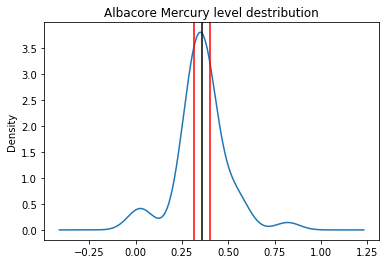

In [184]:
#plotting CI for albacore['Mercury']

CI = confidence_interval(albacore['Mercury'])

albacore['Mercury'].plot.density()
plt.title("Albacore Mercury level destribution")
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red');
plt.show()

Determining Confidence Interval for albacore['Mercury'] using stats.bayes_mvs

In [199]:
CI,_,_ = stats.bayes_mvs(albacore['Mercury'], alpha=.95,)

print("CI:", CI)

CI: Mean(statistic=0.35762558139534883, minmax=(0.3151596084747521, 0.40009155431594556))


**--> As expected values of mean, CI upper bound and lower bound are nearly identical.

In [201]:
## Second example
# determining Confidence Interval for yellowfin['Mercury']
lower_bound, mean, upper_bound = confidence_interval(yellowfin['Mercury'])
print("lower bound:", lower_bound)
print("mean", mean)
print("upper bound:", upper_bound)

lower bound: 0.3244938132674734
mean 0.3544398051948052
upper bound: 0.38438579712213705


In [203]:
CI,_,_ = stats.bayes_mvs(yellowfin['Mercury'], alpha=.95,)
print("CI:", CI)

CI: Mean(statistic=0.3544398051948052, minmax=(0.32449381326747334, 0.3843857971221371))


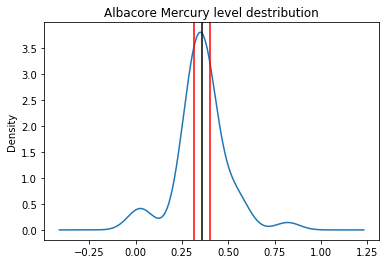

In [222]:
# Plot of bayes data
res_mean, res_var, res_std = stats.bayes_mvs(albacore['Mercury'], alpha=.95,)
albacore['Mercury'].plot.density()

plt.title("Albacore Mercury level destribution")
plt.axvline(x=res_mean.statistic, color='black')
plt.axvline(x=res_mean.minmax[0], color='red')
plt.axvline(x=res_mean.minmax[1], color='red');
plt.show()


**In your own words, summarize the difference between Bayesian and Frequentist statistics**

Frequentist statistics does not use or provide the probability of a hypothesis. It is stongly dependant on likelihoods of of observed and non-observed data. 

If i understand bayesian statistics correctly, it uses probabilities for hypothesis and data, where it depends on a prior and likelihood of observed outcomes. I assume that it may be computationally more intense due to the integration over many parameters.

To blatenly oversimplify, frequentists statistics uses samples of a population to predict probability of events within the population, while bayesian statistics uses a pool of prior outcomes to ball-park outcomes, and refines these estimates with each new observation.


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.

-->Done(ish), not sure how to show my work though.

Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective

In [0]:
--> See above. Calculated CI using stats.bayes_mvs()

Check out PyMC3 (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples

In [223]:
pip install pymc3

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pymc3 import  *
import theano
import pandas as pd
from statsmodels.formula.api import glm as glm_sm
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

In [0]:
#(Generalized) Linear and Hierarchical Linear Models in PyMC3
#Linear Regression
size = 50
true_intercept = 1
true_slope = 2
x = np.linspace(0, 1, size)
y = true_intercept + x*true_slope + np.random.normal(scale=.5, size=size)
data = {'x': x, 'y': y}

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, x, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:07<00:00, 688.22draws/s]
The acceptance probability does not match the target. It is 0.8786162149467693, but should be close to 0.8. Try to increase the number of tuning steps.


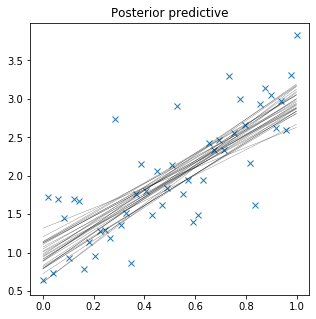

In [234]:
with Model() as model:
    lm = glm.LinearComponent.from_formula('y ~ x', data)
    sigma = Uniform('sigma', 0, 20)
    y_obs = Normal('y_obs', mu=lm.y_est, sigma=sigma, observed=y)
    trace = sample(2000, cores=2)

plt.figure(figsize=(5, 5))
plt.plot(x, y, 'x')
plot_posterior_predictive_glm(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:06<00:00, 725.52draws/s]


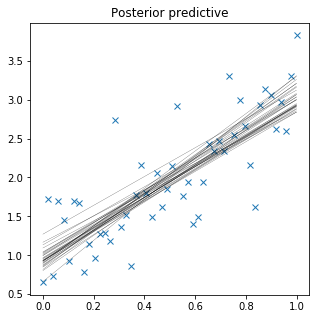

In [235]:
with Model() as model:
    GLM.from_formula('y ~ x', data)
    trace = sample(2000, cores=2)

plt.figure(figsize=(5, 5))
plt.plot(x, y, 'x')
plot_posterior_predictive_glm(trace)

In [0]:
#Robust GLM
x_out = np.append(x, [.1, .15, .2])
y_out = np.append(y, [8, 6, 9])
data_outlier = dict(x=x_out, y=y_out)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:06<00:00, 744.71draws/s]


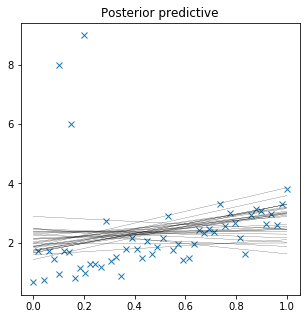

In [251]:
with Model() as model:
    GLM.from_formula('y ~ x', data_outlier)
    trace = sample(2000, cores=2)

plt.figure(figsize=(5, 5))
plt.plot(x_out, y_out, 'x')
plot_posterior_predictive_glm(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lam, x, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:08<00:00, 606.64draws/s]


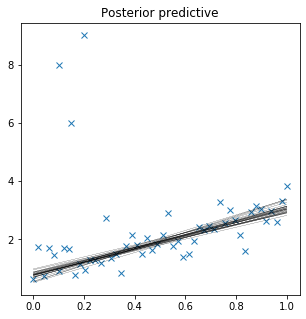

In [237]:
with Model() as model_robust:
    family = glm.families.StudentT(link=glm.families.Identity(),
                                   priors={'nu': 1.5,
                                           'lam': Uniform.dist(0, 20)})
    GLM.from_formula('y ~ x', data_outlier, family=family)
    trace = sample(2000, cores=2)

plt.figure(figsize=(5, 5))
plt.plot(x_out, y_out, 'x')
plot_posterior_predictive_glm(trace)

In [0]:
#Hierarchical GLM
sat_data = pd.read_csv(get_data('Guber1999data.txt'))

In [239]:
with Model() as model_sat:
    grp_mean = Normal('grp_mean', mu=0, sigma=10)
    grp_sd = Uniform('grp_sd', 0, 200)
    # Define priors for intercept and regression coefficients.
    priors = {'Intercept': Normal.dist(mu=sat_data.sat_t.mean(), sigma=sat_data.sat_t.std()),
              'spend': Normal.dist(mu=grp_mean, sigma=grp_sd),
              'stu_tea_rat': Normal.dist(mu=grp_mean, sigma=grp_sd),
              'salary': Normal.dist(mu=grp_mean, sigma=grp_sd),
              'prcnt_take': Normal.dist(mu=grp_mean, sigma=grp_sd)
              }
    GLM.from_formula(
        'sat_t ~ spend + stu_tea_rat + salary + prcnt_take', sat_data, priors=priors)
    trace_sat = sample(2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, prcnt_take, salary, stu_tea_rat, spend, Intercept, grp_sd, grp_mean]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:40<00:00, 122.62draws/s]


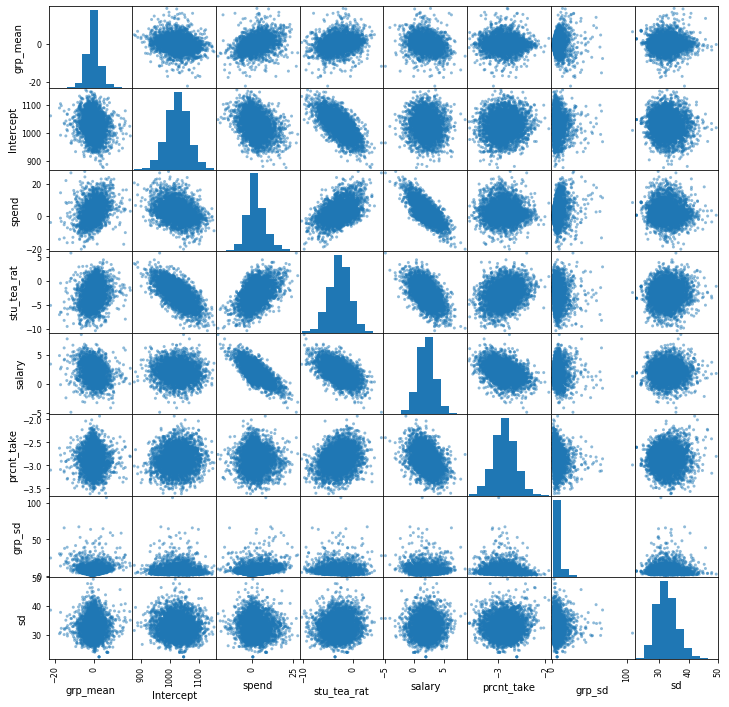

In [240]:
scatter_matrix(trace_to_dataframe(trace_sat), figsize=(12,12));

In [241]:
with Model() as model_sat:
    grp_mean = Normal('grp_mean', mu=0, sigma=10)
    grp_prec = Gamma('grp_prec', alpha=1, beta=.1, testval=1.)
    slope = StudentT.dist(mu=grp_mean, lam=grp_prec, nu=1)
    intercept = Normal.dist(mu=sat_data.sat_t.mean(), sigma=sat_data.sat_t.std())
    GLM.from_formula('sat_t ~ spend + stu_tea_rat + salary + prcnt_take', sat_data,
        priors={'Intercept': intercept, 'Regressor': slope})
    trace_sat = sample(2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, prcnt_take, salary, stu_tea_rat, spend, Intercept, grp_prec, grp_mean]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:46<00:00, 107.70draws/s]
The number of effective samples is smaller than 25% for some parameters.


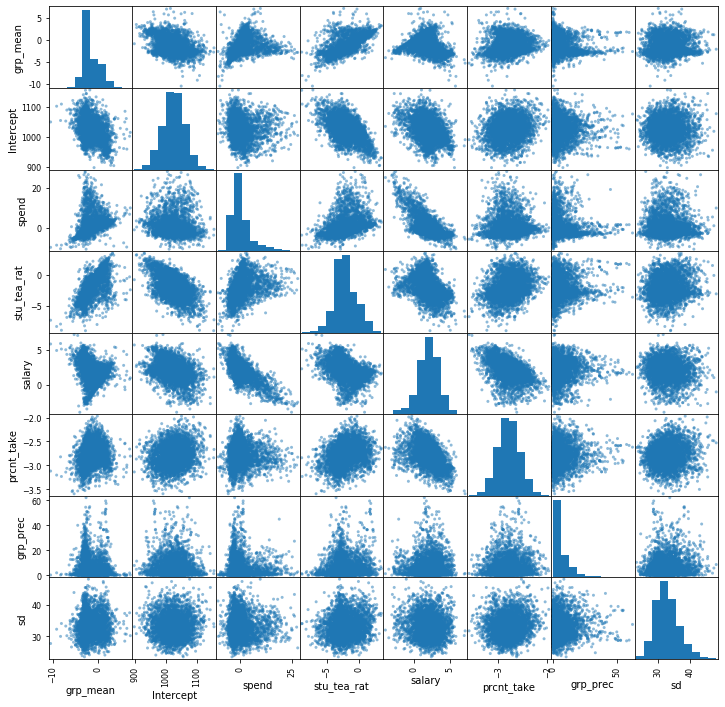

In [242]:
scatter_matrix(trace_to_dataframe(trace_sat), figsize=(12,12));

In [243]:
tdf_gain = 5.
with Model() as model_sat:
    grp_mean = Normal('grp_mean', mu=0, sigma=10)
    grp_prec = Gamma('grp_prec', alpha=1, beta=.1, testval=1.)
    slope = StudentT.dist(mu=grp_mean, lam=grp_prec, nu=1) #grp_df)
    intercept = Normal.dist(mu=sat_data.sat_t.mean(), sigma=sat_data.sat_t.std())
    GLM.from_formula('sat_t ~ spend + stu_tea_rat + salary + prcnt_take', sat_data,
                priors={'Intercept': intercept, 'Regressor': slope})

    trace_sat = sample(2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, prcnt_take, salary, stu_tea_rat, spend, Intercept, grp_prec, grp_mean]
Sampling 2 chains: 100%|██████████| 5000/5000 [01:00<00:00, 69.46draws/s]
The number of effective samples is smaller than 25% for some parameters.


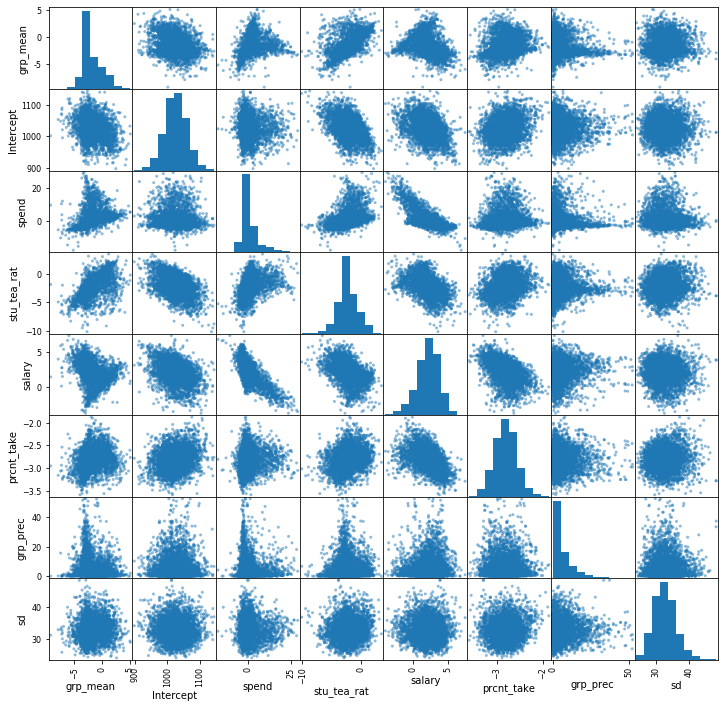

In [244]:
scatter_matrix(trace_to_dataframe(trace_sat), figsize=(12,12));

In [245]:
#Logistic Regression
htwt_data = pd.read_csv(get_data('HtWt.csv'))
htwt_data.head()

,male,height,weight
0,0,63.2,168.7
1,0,68.7,169.8
2,0,64.8,176.6
3,0,67.9,246.8
4,1,68.9,151.6


In [246]:
m = glm_sm('male ~ height + weight', htwt_data, family=sm.families.Binomial()).fit()
print(m.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   male   No. Observations:                   70
Model:                            GLM   Df Residuals:                       67
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28.298
Date:                Wed, 19 Feb 2020   Deviance:                       56.597
Time:                        23:48:27   Pearson chi2:                     62.8
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -45.2059     10.887     -4.152      0.0

In [247]:
with Model() as model_htwt:
    GLM.from_formula('male ~ height + weight', htwt_data, family=glm.families.Binomial())
    trace_htwt = sample(2000, cores=2, init='adapt_diag') # default init with jitter can cause problem

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [weight, height, Intercept]
Sampling 2 chains: 100%|██████████| 5000/5000 [01:05<00:00, 75.82draws/s]
The acceptance probability does not match the target. It is 0.8924222392287416, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


                mean        std         min  ...        50%        75%        max
Intercept -50.446660  12.384681 -103.147626  ... -49.946249 -41.624296 -15.994672
height      0.733976   0.186641    0.216796  ...   0.724668   0.856477   1.555956
weight      0.010320   0.011110   -0.028938  ...   0.010133   0.017763   0.054931

[3 rows x 7 columns]
P(weight < 0) =  0.1705
P(height < 0) =  0.0


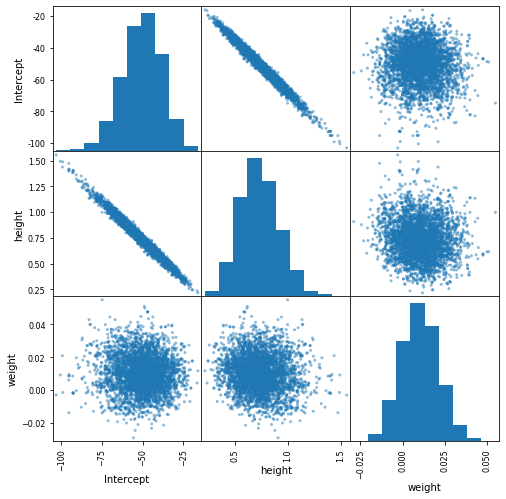

In [248]:
trace_df = trace_to_dataframe(trace_htwt)
print(trace_df.describe().drop('count').T)
scatter_matrix(trace_df, figsize=(8, 8))
print("P(weight < 0) = ", (trace_df['weight'] < 0).mean())
print("P(height < 0) = ", (trace_df['height'] < 0).mean())

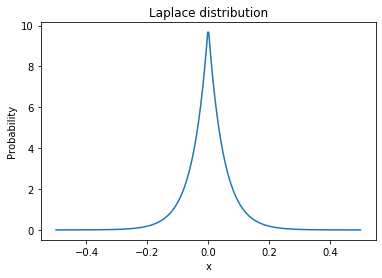

In [249]:
#Bayesian Logistic Lasso
lp = Laplace.dist(mu=0, b=0.05)
x_eval = np.linspace(-.5, .5, 300)
plt.plot(x_eval, theano.tensor.exp(lp.logp(x_eval)).eval())
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Laplace distribution');

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [weight, height, Intercept]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:20<00:00, 95.32draws/s]


                mean       std        min  ...        50%        75%       max
Intercept -25.386635  6.861543 -45.176999  ... -25.143747 -20.263564 -6.885125
height      0.353990  0.104355   0.082783  ...   0.352055   0.427198  0.654086
weight      0.011960  0.009234  -0.012874  ...   0.011956   0.018005  0.041018

[3 rows x 7 columns]


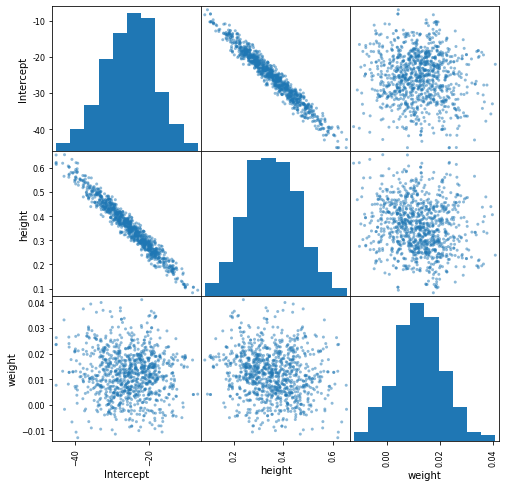

In [250]:
with Model() as model_lasso:
    # Define priors for intercept and regression coefficients.
    priors = {'Intercept': Normal.dist(mu=0, sigma=50),
              'Regressor': Laplace.dist(mu=0, b=0.05)
    }
    GLM.from_formula('male ~ height + weight', htwt_data, family=glm.families.Binomial(),
                    priors=priors)

    trace_lasso = sample(500, cores=2, init='adapt_diag')

trace_df = trace_to_dataframe(trace_lasso)
scatter_matrix(trace_df, figsize=(8, 8));
print(trace_df.describe().drop('count').T)